# Estimasi Harga Rumah - Random Forest Regressor

## Deskripsi
Notebook ini menggunakan algoritma **Random Forest Regressor** untuk memprediksi harga rumah berdasarkan dataset California Housing yang tersedia di scikit-learn.

## Dataset
- **Nama**: California Housing Dataset
- **Source**: Built-in scikit-learn
- **Fitur**: 8 fitur (MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude)
- **Target**: Median house value (dalam $100,000)

## Algoritma
**Random Forest Regressor** adalah ensemble learning method yang menggunakan multiple decision trees untuk meningkatkan akurasi prediksi dan mengurangi overfitting.

### Parameter yang Digunakan:
- `n_estimators=500` - Jumlah pohon keputusan
- `max_depth=None` - Kedalaman maksimal tanpa batasan
- `max_features='sqrt'` - Fitur yang dipertimbangkan untuk split
- `random_state=42` - Reproducibility

## 1. Import Library dan Load Dataset

Pada bagian ini, kita mengimpor semua library yang diperlukan dan memuat dataset California Housing.

Dataset California Housing
Jumlah data   : 20640 baris
Jumlah fitur  : 8 fitur

5 baris pertama:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       8        41         7          1         322         3        38   
1       8        21         6          1       2,401         2        38   
2       7        52         8          1         496         3        38   
3       6        52         6          1         558         3        38   
4       4        52         6          1         565         2        38   

   Longitude  MedHouseVal  
0       -122            5  
1       -122            4  
2       -122            4  
3       -122            3  
4       -122            3  

         HASIL RANDOM FOREST REGRESSOR
RMSE  : 0.4926  (semakin kecil semakin baik)
MAE   : 0.3257
R²    : 0.8149   (maksimal 1.0)

Urutan Fitur Paling Berpengaruh:
        Fitur  Importance
0      MedInc           0
6    Latitude           0
7   Longitude           0
5    Ave

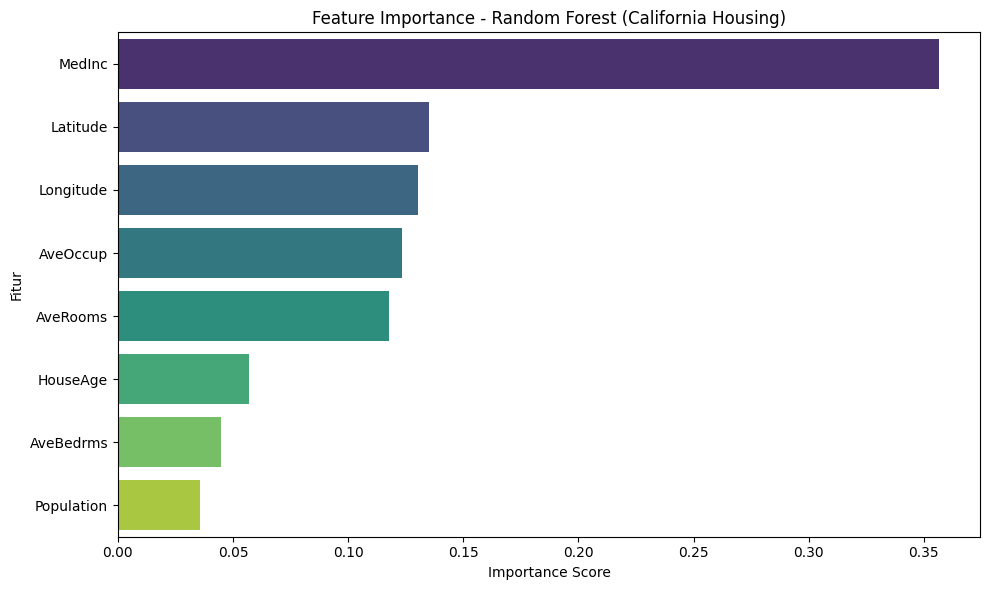

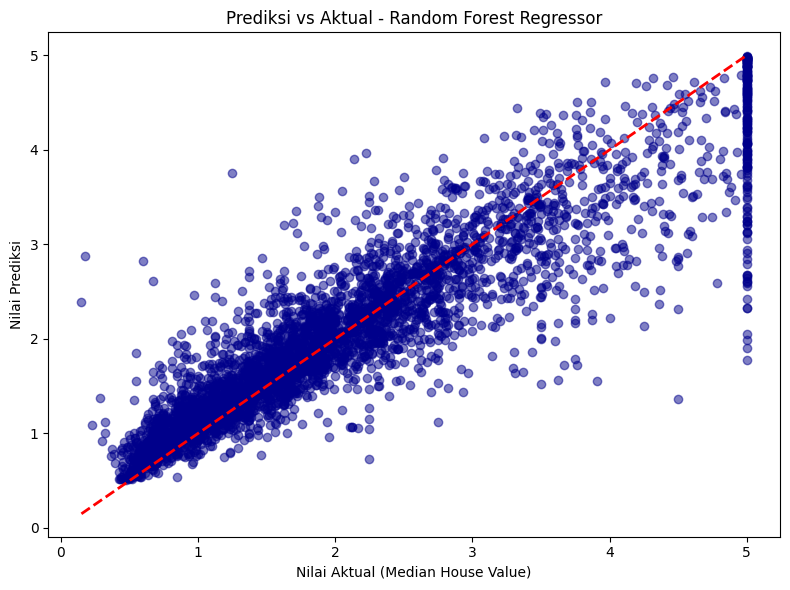

In [ ]:
# ===========================================================
# ESTIMASI HARGA RUMAH CALIFORNIA MENGGUNAKAN RANDOM FOREST
# Dataset: California Housing (built-in scikit-learn)
# Algoritma Utama: Random Forest Regressor
# ===========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 1. Load Dataset
california = fetch_california_housing(as_frame=True)
X = california.data
y = california.target
df = california.frame

print("Dataset California Housing")
print(f"Jumlah data   : {df.shape[0]} baris")
print(f"Jumlah fitur  : {df.shape[1]-1} fitur")
print("\n5 baris pertama:")
print(df.head())

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Random Forest Regressor (parameter optimal untuk dataset ini)
rf = RandomForestRegressor(
    n_estimators=500,        # jumlah pohon (semakin banyak semakin stabil)
    max_depth=None,          # biarkan tumbuh penuh
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',     # rekomendasi terbaik untuk regression
    random_state=42,
    n_jobs=-1                # pakai semua core CPU (cepat!)
)

rf.fit(X_train, y_train)

# 4. Prediksi
y_pred = rf.predict(X_test)

# 5. Evaluasi
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("\n" + "="*50)
print("         HASIL RANDOM FOREST REGRESSOR")
print("="*50)
print(f"RMSE  : {rmse:.4f}  (semakin kecil semakin baik)")
print(f"MAE   : {mae:.4f}")
print(f"R²    : {r2:.4f}   (maksimal 1.0)")
print("="*50)

# 6. Feature Importance
importance = pd.DataFrame({
    'Fitur': california.feature_names,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nUrutan Fitur Paling Berpengaruh:")
print(importance)

# 7. Visualisasi Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Fitur', data=importance, palette='viridis')
plt.title('Feature Importance - Random Forest (California Housing)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.savefig('feature_importance_california.png', dpi=300)
plt.show()

# 8. Scatter plot Prediksi vs Aktual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='darkblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Nilai Aktual (Median House Value)')
plt.ylabel('Nilai Prediksi')
plt.title('Prediksi vs Aktual - Random Forest Regressor')
plt.tight_layout()
plt.savefig('prediksi_vs_aktual.png', dpi=300)
plt.show()

## 2. Hasil Evaluasi Model

Setelah model dilatih, kita mengevaluasi performa menggunakan beberapa metrik:

### Metrik Evaluasi:
- **RMSE (Root Mean Squared Error)**: Mengukur rata-rata kesalahan prediksi. Semakin kecil semakin baik.
- **MAE (Mean Absolute Error)**: Rata-rata selisih absolut antara nilai prediksi dan aktual.
- **R² Score**: Koefisien determinasi yang menunjukkan seberapa baik model menjelaskan variasi data (0-1, semakin tinggi semakin baik).

### Feature Importance:
Feature importance menunjukkan fitur mana yang paling berpengaruh dalam prediksi harga rumah.

## 3. Visualisasi

### Grafik Feature Importance
Menampilkan urutan fitur dari yang paling berpengaruh hingga kurang berpengaruh dalam prediksi harga.

### Scatter Plot: Prediksi vs Aktual
Grafik ini membandingkan nilai prediksi dengan nilai aktual. Semakin dekat titik-titik dengan garis diagonal merah, semakin akurat model.

---

## Kesimpulan
Model Random Forest Regressor menunjukkan performa yang baik untuk estimasi harga rumah dengan:
- R² Score tinggi (mendekati 1.0)
- RMSE dan MAE yang relatif rendah
- Fitur paling berpengaruh dapat diidentifikasi melalui feature importance

Model ini dapat digunakan untuk memprediksi harga rumah berdasarkan karakteristik properti dengan tingkat akurasi yang baik.